# Gaming Stocks Analysis
---

## Author Information

Name : Darryn Johnson

Date last updated : 11/28/2024

---
## Sources and Links

Original Kaggle dataset : [Video Game Stocks: Financial Market Data](https://www.kaggle.com/datasets/datadrivenx/video-game-stocks-financial-market-data)

---
# Overview

---
# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
# Reproducability

To reproduce these results yourself, open google colab and locate this github repo under my github account. From there, simply run the notebook from start to finish.

In [2]:
# !kaggle datasets download -d datadrivenx/video-game-stocks-financial-market-data
# !unzip datadrivenx/video-game-stocks-financial-market-data

---
# Business Understanding 

The purpose of the following notebook is to look into patters in the stock market ragerding gaming tech companies. This is valuable to shareholders and investors as it gives insigt to the iner-workings of this specific field, and can inform a decision.

- Business Objectives
    - analize stock data to locate a trend
- Situation Assesement
    - resources available
        - stock opening/closing prices, trading volume, and other relevant financial indicators
    - resources unavailable
        - undisclosed internal information such as :
            - upcoming unanounced releases
            - internal stresses that may cause unpredictable outcomes
- Data Mining Goal
    - assess and understand the data provided
- Project plan
    - produce accurate and usable metrics to inform a decision regarding stock market investments

---
# Data Understanding 
Let's take a quick look into what the data we are working with actually is. In this case, we have metadata, which is just data about the data.  

## Column Metadata

- Company
    - The name of the video game company
- Ticker Symbol
    - The stock's unique symbol used for trading
- Currency
    - The currency used for the stock's price
        - USD - United States Dollar | 1 : 1 USD
            - Microsoft Gaming
            - Electronic Arts
            - Take Two interactive
            - NetEase Games
            - Roblox Corporation
            - Nintendo
            - Playtika
        - JPY - Japanese Yen | 1 JPY : 0.0067 USD
            - Sony Interactive Entertainment
        - HKD - Hong Kong Dollar | 1 HKD : 0.13 USD
            - Tencent Interactive Entertainment
        - SEK - Swedish Krona | 1 SEK : 0.092 USD
            - Embracer Group
- Open
    - The stock price at market open for the given day
- High
    - The highest stock price during the trading day
- Low
    - The lowest stock price during the trading day
- Close
    - The stock price at market close for the given day
- Adj Close
    - The adjusted closing price, accounting for dividends and stock splits
        - dividends
            - a payment to a shareholder with additional stocks rather then money
        - stock splits
            - spliting owned stocks into smaller subsets, while maintaining the overall value of the stocks 
- Volume
    - The total number of shares traded during the day

## Note From Original Dataset Creator

While _Epic Games_ and _MiHoYo_ are also major players in the video game industry, and would have ranked no. 7 and 10 respectively, they are privately held and do not have publicly traded stocks, so their financial data is not included in this dataset.

The dataset contains monthly data for the period from January 1, 2000, to October 31, 2024. The data was extracted using the Yahoo Finance library in Python, and includes key market metrics such as stock opening/closing prices, trading volume, and other relevant financial indicators.

---
# Data Distribution

---
# Data Preparation

---
## Methodology

---
# Functions

In [3]:
def value_calc(company, col):
    '''
    This function takes in 2 arguments, what company you want, and what col to sum.

    example : (Nintendo, Open)

    requirments : company input must str, col input must be str.
    '''
    
    d_frame = df[df['Company'] == company]
    print(sum(d_frame[col]))

---
# Exploritory Data Analysis (EDA)

In [4]:
df = pd.read_csv('gaming_stocks.zip')

In [5]:
df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2209 non-null   object 
 1   Company        2209 non-null   object 
 2   Ticker Symbol  2209 non-null   object 
 3   Currency       2209 non-null   object 
 4   Open           2209 non-null   float64
 5   High           2209 non-null   float64
 6   Low            2209 non-null   float64
 7   Close          2209 non-null   float64
 8   Adj Close      2209 non-null   float64
 9   Volume         2209 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 172.7+ KB


In [7]:
df['Company'].value_counts()

Company
Sony Interactive Entertainment       298
Microsoft Gaming                     298
Nintendo                             298
Electronic Arts                      298
Take-Two Interactive                 298
NetEase Games                        292
Tencent Interactive Entertainment    244
Embracer Group                        95
Playtika                              45
Roblox Corporation                    43
Name: count, dtype: int64

In [8]:
df['Currency'].value_counts()

Currency
USD    1572
JPY     298
HKD     244
SEK      95
Name: count, dtype: int64

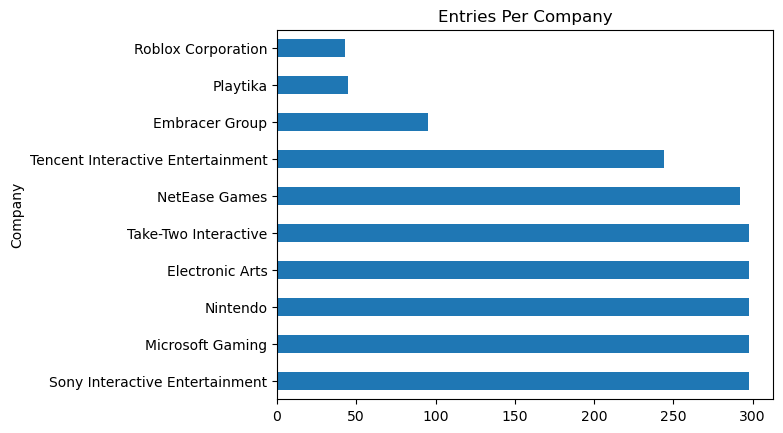

In [9]:
fig, ax = plt.subplots()
df['Company'].value_counts().plot(kind = 'barh')
ax.set_title('Entries Per Company')
plt.show();

## Open Values

In [10]:
df['Open Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Open Value in USD'] = row['Open']

In [11]:
value_calc('Tencent Interactive Entertainment', 'Open')

41144.35937303305


In [12]:
value_calc('Microsoft Gaming', 'Open')

26760.73865222931


In [13]:
value_calc('Electronic Arts', 'Open')

18886.085459709167


In [14]:
value_calc('Take-Two Interactive', 'Open')

15885.676261425018


In [15]:
value_calc('NetEase Games', 'Open')

9021.176662750542


In [16]:
value_calc('Embracer Group', 'Open')

4455.816321372986


In [17]:
value_calc('Sony Interactive Entertainment', 'Open')

2931.3857514858246


In [18]:
value_calc('Roblox Corporation', 'Open')

2156.550006866455


In [19]:
value_calc('Nintendo', 'Open')

1986.322623848915


In [20]:
value_calc('Playtika', 'Open')

657.7599992752075


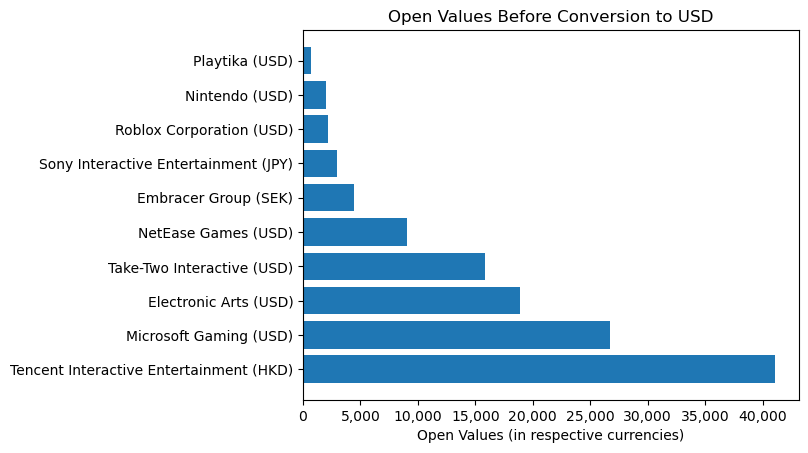

In [21]:
fig, ax = plt.subplots()

height = [41114, 26760, 18886, 15885, 9021, 4455, 2931, 2156, 1986, 657]
x = range(len(height))
labels = ['Tencent Interactive Entertainment (HKD)','Microsoft Gaming (USD)','Electronic Arts (USD)','Take-Two Interactive (USD)',
          'NetEase Games (USD)','Embracer Group (SEK)', 'Sony Interactive Entertainment (JPY)', 'Roblox Corporation (USD)','Nintendo (USD)', 
          'Playtika (USD)']
plt.barh(x, height, tick_label = labels)
ax.set_title('Open Values Before Conversion to USD')
ax.set_xlabel('Open Values (in respective currencies)')
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show();

In [22]:
value_calc('Microsoft Gaming', 'Open Value in USD')

26760.73865222931


In [23]:
value_calc('Electronic Arts', 'Open Value in USD')

18886.085459709167


In [24]:
value_calc('Take-Two Interactive', 'Open Value in USD')

15885.676261425018


In [25]:
value_calc('NetEase Games', 'Open Value in USD')

9021.176662750542


In [26]:
value_calc('Tencent Interactive Entertainment', 'Open Value in USD')

5348.766718494297


In [27]:
value_calc('Roblox Corporation', 'Open Value in USD')

2156.550006866455


In [28]:
value_calc('Nintendo', 'Open Value in USD')

1986.322623848915


In [29]:
value_calc('Playtika', 'Open Value in USD')

657.7599992752075


In [30]:
value_calc('Embracer Group', 'Open Value in USD')

409.9351015663147


In [31]:
value_calc('Sony Interactive Entertainment', 'Open Value in USD')

19.640284534955025


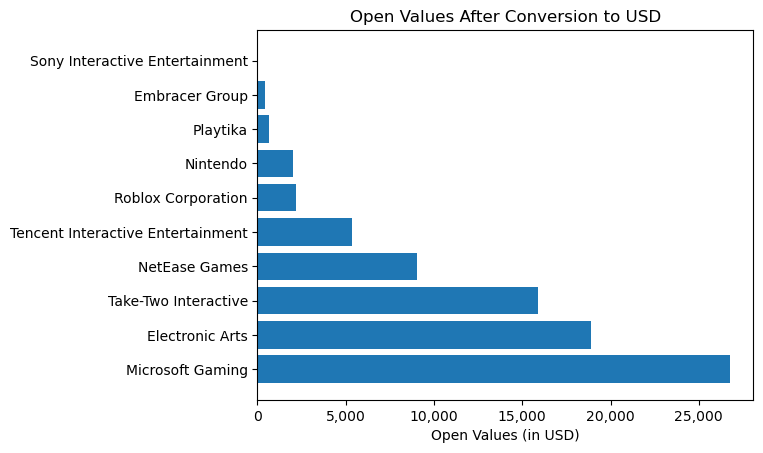

In [32]:
fig, ax = plt.subplots()

height_2 = [26760, 18886, 15885, 9021, 5348, 2156, 1986, 657, 409, 19]
x_2 = range(len(height_2))
labels_2 = ['Microsoft Gaming', 'Electronic Arts', 'Take-Two Interactive', 'NetEase Games', 'Tencent Interactive Entertainment', 
            'Roblox Corporation', 'Nintendo', 'Playtika', 'Embracer Group', 'Sony Interactive Entertainment']
plt.barh(x_2, height_2, tick_label = labels_2)
ax.set_title('Open Values After Conversion to USD')
ax.set_xlabel('Open Values (in USD)')
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show();

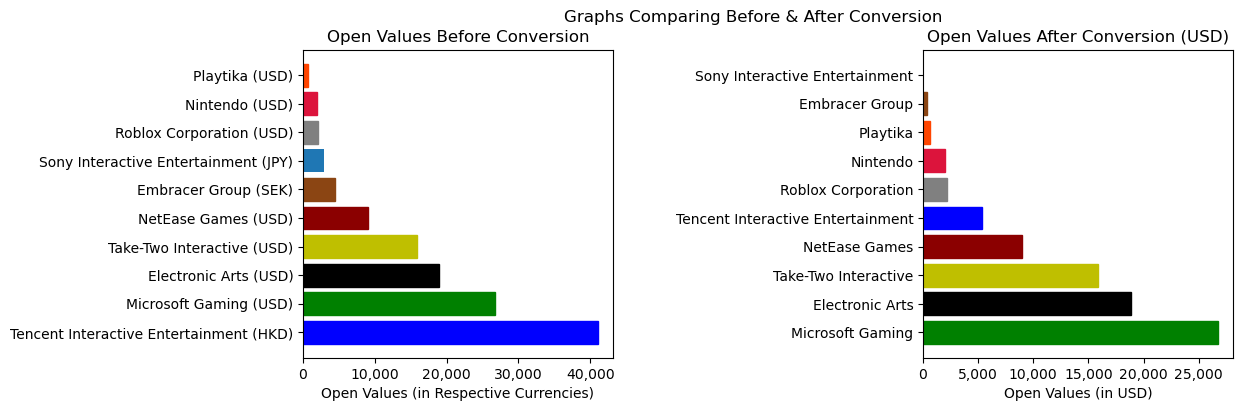

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].barh(x,height, tick_label = labels)
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('gray')
g_0[8].set_color('crimson')
g_0[9].set_color('orangered')
ax[0].set_title('Open Values Before Conversion')
ax[0].set_xlabel('Open Values (in Respective Currencies)')

g_1 = ax[1].barh(x_2, height_2, tick_label = labels_2)
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('gray')
g_1[6].set_color('crimson')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('Open Values After Conversion (USD)')
ax[1].set_xlabel('Open Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (Open Value)')
plt.show();

## High Values

In [34]:
df['High Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'High Value in USD'] = row['High']

In [35]:
df['Company'].value_counts()

Company
Sony Interactive Entertainment       298
Microsoft Gaming                     298
Nintendo                             298
Electronic Arts                      298
Take-Two Interactive                 298
NetEase Games                        292
Tencent Interactive Entertainment    244
Embracer Group                        95
Playtika                              45
Roblox Corporation                    43
Name: count, dtype: int64

In [36]:
value_calc('Tencent Interactive Entertainment','High')

44503.59677731991


In [37]:
value_calc('Microsoft Gaming','High')

28383.683738708496


In [38]:
value_calc('Electronic Arts','High')

20149.436675071716


In [39]:
value_calc('Take-Two Interactive','High')

17125.438340187073


In [40]:
value_calc('NetEase Games','High')

9849.945414692163


In [41]:
value_calc('Embracer Group','High')

4945.703266620636


In [42]:
value_calc('Sony Interactive Entertainment', 'High')

3128.2870082855225


In [43]:
value_calc('Roblox Corporation','High')

2490.016010284424


In [44]:
value_calc('Nintendo','High')

2142.2867448329926


In [45]:
value_calc('Playtika','High')

712.3770027160645


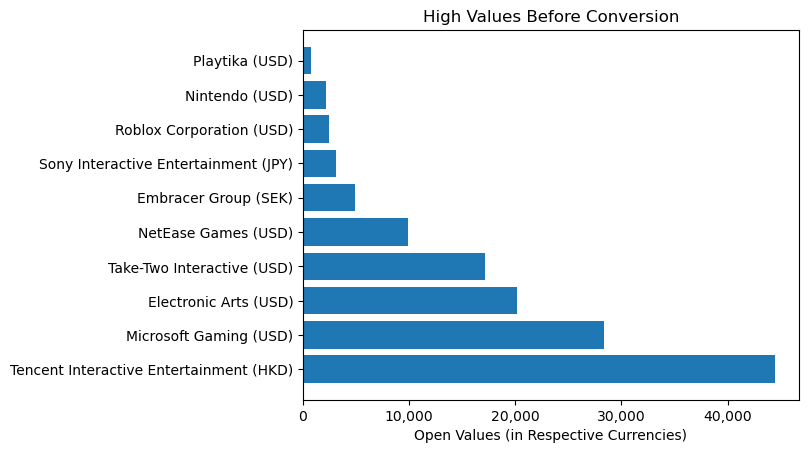

In [62]:
fig, ax = plt.subplots()

high_height = [44503, 28383, 20149, 17125, 9849, 4945, 3128, 2490, 2142, 712]
x_high = range(len(height))
labels_high = ['Tencent Interactive Entertainment (HKD)', 'Microsoft Gaming (USD)', 'Electronic Arts (USD)', 'Take-Two Interactive (USD)', 
          'NetEase Games (USD)', 'Embracer Group (SEK)', 'Sony Interactive Entertainment (JPY)', 'Roblox Corporation (USD)', 'Nintendo (USD)', 
          'Playtika (USD)']

ax.set_title('High Values Before Conversion')
ax.set_xlabel('Open Values (in Respective Currencies)')
plt.barh(x_high, high_height, tick_label = labels_high)
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show();

In [47]:
value_calc('Microsoft Gaming', 'High Value in USD')

28383.683738708496


In [48]:
value_calc('Electronic Arts', 'High Value in USD')

20149.436675071716


In [49]:
value_calc('Take-Two Interactive', 'High Value in USD')

17125.438340187073


In [50]:
value_calc('NetEase Games', 'High Value in USD')

9849.945414692163


In [51]:
value_calc('Tencent Interactive Entertainment', 'High Value in USD')

5785.467581051588


In [52]:
value_calc('Roblox Corporation', 'High Value in USD')

2490.016010284424


In [53]:
value_calc('Nintendo', 'High Value in USD')

2142.2867448329926


In [54]:
value_calc('Playtika', 'High Value in USD')

712.3770027160645


In [55]:
value_calc('Embracer Group', 'High Value in USD')

455.0047005290985


In [56]:
value_calc('Sony Interactive Entertainment', 'High Value in USD')

20.959522955513002


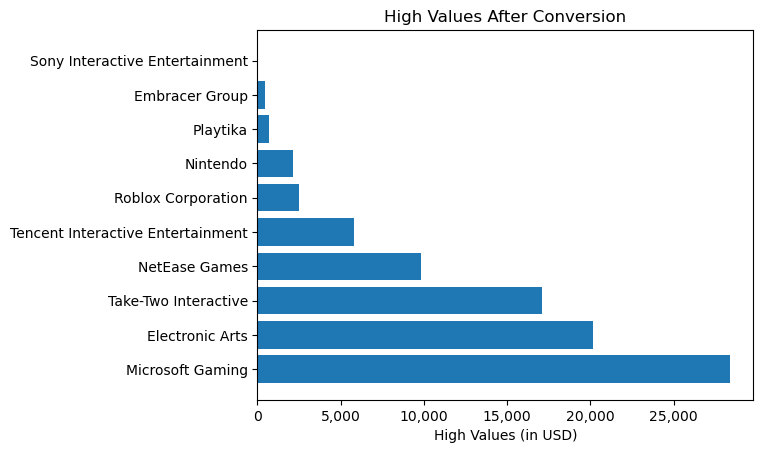

In [63]:
fig, ax = plt.subplots()

high_height_2 = [28383, 20149, 17125, 9849, 5785, 2490, 2142, 712, 455, 20]
high_x_2 = range(len(height_2))
high_labels_2 = ['Microsoft Gaming', 'Electronic Arts', 'Take-Two Interactive', 'NetEase Games', 'Tencent Interactive Entertainment', 
          'Roblox Corporation', 'Nintendo', 'Playtika', 'Embracer Group', 'Sony Interactive Entertainment']

ax.set_title('High Values After Conversion')
ax.set_xlabel('High Values (in USD)')
plt.barh(high_x_2, high_height_2, tick_label = high_labels_2)
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show();

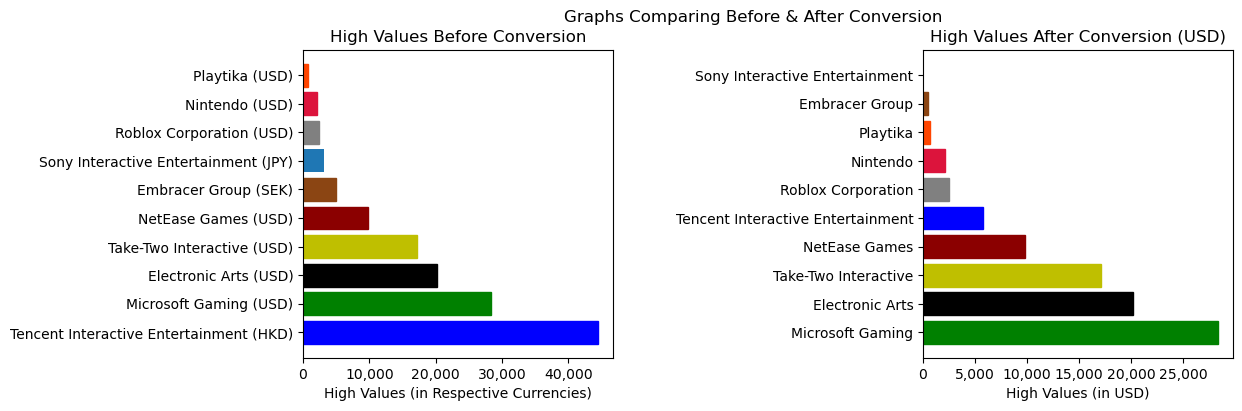

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].barh(x_high, high_height, tick_label = labels_high)
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('gray')
g_0[8].set_color('crimson')
g_0[9].set_color('orangered')
ax[0].set_title('High Values Before Conversion')
ax[0].set_xlabel('High Values (in Respective Currencies)')

g_1 = ax[1].barh(high_x_2, high_height_2, tick_label = high_labels_2)
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('gray')
g_1[6].set_color('crimson')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('High Values After Conversion (USD)')
ax[1].set_xlabel('High Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (High Value)')
plt.show();

## Low Values

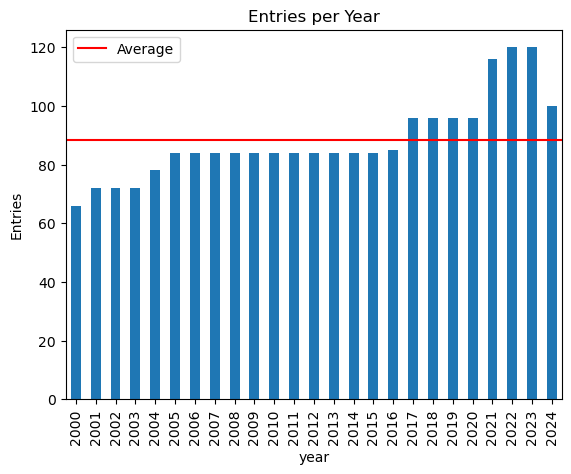

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
entries_per_year = df.groupby('year').size()

fig, ax = plt.subplots()

ax.set_title('Entries per Year')
ax.set_ylabel('Entries')
avg = sum(entries_per_year) / len(entries_per_year)
ax.axhline(avg, color = 'r')
entries_per_year.plot(kind = 'bar')
plt.legend(['Average'])
plt.show();

In [59]:
print(avg)

88.36


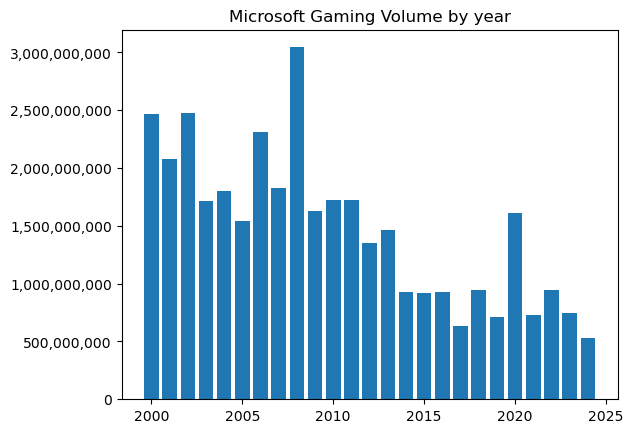

In [60]:
df_micro = df[df['Company'] == 'Microsoft Gaming']

fig, ax = plt.subplots()

x = df_micro['year']
y = df_micro['Volume']
ax.set_title('Microsoft Gaming Volume by year')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
ax.bar(x, y)
plt.show();

df['Open Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Open Value in USD'] = row['Open']

In [61]:
df_micro.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Open Value in USD,High Value in USD,year
542,2000-01-01,Microsoft Gaming,MSFT,USD,58.68750,59.3125,47.43750,48.93750,30.174570,1274875200,58.6875,59.3125,2000
543,2000-02-01,Microsoft Gaming,MSFT,USD,49.25000,55.0000,44.06250,44.68750,27.554047,1334487600,49.25,55.0,2000
544,2000-03-01,Microsoft Gaming,MSFT,USD,44.81250,57.5000,44.46875,53.12500,32.756535,2028187600,44.8125,57.5,2000
545,2000-04-01,Microsoft Gaming,MSFT,USD,47.21875,48.2500,32.50000,34.87500,21.503712,2258146600,47.21875,48.25,2000
546,2000-05-01,Microsoft Gaming,MSFT,USD,36.43750,37.0000,30.18750,31.28125,19.287834,1344430800,36.4375,37.0,2000
